## Hypothesis
To predict the incentive level requested for raising thermostat settings for 2-3F 
    when being at home in summer.

### Filter: HomeSYN=1 (i.e., only use people who use A/C when being at home in summer)


In [38]:
options(digits=2);
# Read in the data
survey <- read.csv("DR_Survey2_Share_Complete.csv",header=T);
#populate missing values
survey$IncHomeS[survey$IncHomeS==99] = NA;

data <- survey[,-c(1:7)];

#We investigate only use people who use A/C when being at home in summer
data1 <- data[data$HomeSYN==1,-which(names(data) %in% c("HomeWYN","AwayWNY","HomeSYN","AwaySNY","City","Utility",
    "ReasonPos","ReasonNeg","NBillS","NBillW","valid1","valid2","valid","Attitude","Trust",
    "EnergyC","MCG", "MCBill","Frugal","ComfortS","ComfortW","SubN","PBC","ACYN","HeatYN",
    "Longitude", "Job","hot","cold"))];
sort(names(survey))
table(survey$Job)
table(survey$Political)

[1] "ACYN"        "Age"         "Atti1"       "Atti2"       "Atti3"      
  [6] "Atti4"       "Attitude"    "AwayS"       "AwaySNY"     "AwayW"      
 [11] "AwayWNY"     "BillS"       "BillW"       "City"        "ComfNS1"    
 [16] "ComfNS2"     "ComfNS3"     "ComfNW1"     "ComfNW2"     "ComfortS"   
 [21] "ComfortW"    "CompR"       "ControlN1"   "ControlN2R"  "ControlN3"  
 [26] "ControlN4"   "ConvB1"      "ConvB2"      "ConvB3"      "ConvB4"     
 [31] "DeviceType"  "Educ"        "EmerRForm"   "EnergyC"     "EnergyC1"   
 [36] "EnergyC2"    "EnergyC3"    "EnergyC4"    "Ethnic"      "Frugal"     
 [41] "Frugal1"     "Frugal2"     "Frugal3"     "Gender"      "HTdevice"   
 [46] "HTsource"    "HabitC1"     "HabitC2"     "HabitC3"     "HabitC4"    
 [51] "HabitC5"     "HabitC6"     "HabitC7"     "HabitE1"     "HabitE2"    
 [56] "HabitE3"     "HeatYN"      "HomeS"       "HomeSYN"     "HomeW"      
 [61] "HomeWYN"     "HouseholdS"  "ID"          "INT1"        "INT2"       
 [66] "INT3"        "INT4"        "IncAutoS"    "IncAutoW"    "IncAwayS"   
 [71] "IncAwayW"    "IncDish"     "IncEmer10S"  "IncEmer10W"  "IncEmer30S" 
 [76] "IncEmer30W"  "IncHomeS"    "IncHomeW"    "IncWD"       "Income"     
 [81] "Job"         "Latitude"    "Longitude"   "MC1"         "MC2"        
 [86] "MC3"         "MC4"         "MC5"         "MCBill"      "MCG"        
 [91] "NBillS"      "NBillW"      "OwnRent"     "PBC"         "PBC1"       
 [96] "PBC2"        "PBC3R"       "PBC4"        "PBC5"        "PBillStatus"
[101] "Political"   "ReasonNeg"   "ReasonPos"   "RewardForm"  "SN1"        
[106] "SN2"         "SN3"         "SN4"         "Sqft"        "SqftCate"   
[111] "State"       "SubN"        "SubNorm1"    "SubNorm2"    "SubNorm3"   
[116] "Trust"       "Trust1"      "Trust2"      "Trust3"      "Trust4"     
[121] "Utility"     "X.9to5"      "cold"        "hot"         "valid"      
[126] "valid1"      "valid2"


  1   2   3   4   5   6   7   8   9  10  11  12 
 99  79  33  33  25  64  86  71  43 112  22 156 


  1   2   3   4   5   6   7   8 
118  68 145 163  85  60  87  98 

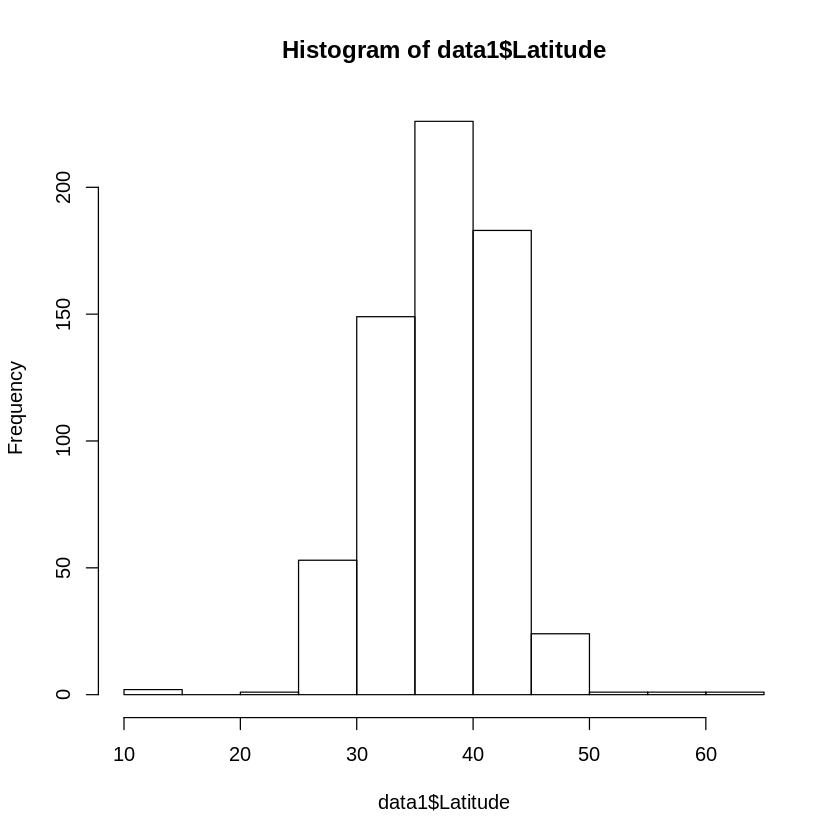

In [42]:
hist(data1$Latitude)

In [3]:
#Frugal-Mean(Frugal1,Frugal2,Frugal3)
tmp <- cbind(Frugal1=data1$Frugal1,Frugal2=data1$Frugal2,Frugal3=data1$Frugal3)
print(dim(tmp))
data1$Frugal <- rowMeans(tmp)
data1 <- data1[,-which(names(data1) %in% c("Frugal1","Frugal2","Frugal3"))]
#print(data1)
table(data1$Political)

[1] 662   3



  1   2   3   4   5   6   7   8 
 92  55 113 128  70  54  73  76 

In [4]:
#MC-Mean(MC3,MC4,MC5)
tmp <- cbind(MC3=data1$MC3,MC4=data1$MC4,MC5=data1$MC5)
print(dim(tmp))
data1$MC <- rowMeans(tmp)
data1 <- data1[,-which(names(data1) %in% c("MC3","MC4","MC5"))]
#print(data1)

[1] 662   3


In [5]:
#EnergyC-Mean(EnergyC1,EnergyC2,EnergyC4)
tmp <- cbind(EnergyC1=data1$EnergyC1,EnergyC2=data1$EnergyC2,EnergyC4=data1$EnergyC4)
print(dim(tmp))
data1$EnergyC <- rowMeans(tmp)
data1 <- data1[,-which(names(data1) %in% c("EnergyC1","EnergyC2","EnergyC4"))]
#print(data1)

[1] 662   3


In [6]:
#Trust-Mean(Trust1,Trust2,Trust3,Trust4)
tmp <- cbind(Trust1=data1$Trust1,Trust2=data1$Trust2,Trust3=data1$Trust3,Trust4=data1$Trust4)
print(dim(tmp))
data1$Trust <- rowMeans(tmp)
data1 <- data1[,-which(names(data1) %in% c("Trust1","Trust2","Trust3","Trust4"))]
#print(data1)

[1] 662   4


In [7]:
#ComfNS-Mean(ComfNS1,ComfNS2,ComfNS3)
tmp <- cbind(ComfNS1=data1$ComfNS1,ComfNS2=data1$ComfNS2,ComfNS3=data1$ComfNS3)
print(dim(tmp))
data1$ComfNS <- rowMeans(tmp)
data1 <- data1[,-which(names(data1) %in% c("ComfNS1","ComfNS2","ComfNS3"))]
#print(data1)

[1] 662   3


In [8]:
#Attitude-Mean(Atti1,Atti2,Atti3,Atti4)
tmp <- cbind(Atti1=data1$Atti1,Atti2=data1$Atti2,Atti3=data1$Atti3,Atti4=data1$Atti4)
print(dim(tmp))
data1$Atti <- rowMeans(tmp)
data1 <- data1[,-which(names(data1) %in% c("Atti1","Atti2","Atti3","Atti4"))]
#print(data1)

[1] 662   4


In [9]:
#SubNorm-Mean(SubNorm1,SubNorm2,SubNorm3)
tmp <- cbind(SubNorm1=data1$SubNorm1,SubNorm=data1$SubNorm2,SubNorm3=data1$SubNorm3)
print(dim(tmp))
data1$SubNorm <- rowMeans(tmp)
data1 <- data1[,-which(names(data1) %in% c("SubNorm1","SubNorm2","SubNorm3"))]
#print(data1)

[1] 662   3


In [10]:
#PBC-Mean(PBC1,PBC2,PBC4,PBC5)
tmp <- cbind(PBC1=data1$PBC1,PBC2=data1$PBC2,PBC4=data1$PBC4,PBC5=data1$PBC5)
print(dim(tmp))
data1$PBC <- rowMeans(tmp)
data1 <- data1[,-which(names(data1) %in% c("PBC1","PBC2","PBC4","PBC5"))]
#print(data1)

[1] 662   4


In [11]:
#SN-Mean(SN1,SN2,SN4)
tmp <- cbind(SN1=data1$SN1,SN=data1$SN2,SN4=data1$SN4)
print(dim(tmp))
data1$SN <- rowMeans(tmp)
data1 <- data1[,-which(names(data1) %in% c("SN1","SN2","SN4"))]
#print(data1)

[1] 662   3


In [12]:
#HabitG-Mean(HabitC1,HabitC2,HabitC3,HabitC4)
tmp <- cbind(HabitC1=data1$HabitC1,HabitC2=data1$HabitC2,HabitC3=data1$HabitC3,HabitC4=data1$HabitC4)
print(dim(tmp))
data1$HabitG <- rowMeans(tmp)
data1 <- data1[,-which(names(data1) %in% c("HabitC1","HabitC2","HabitC4","HabitC5"))]
#print(data1)

[1] 662   4


In [13]:
#HabitHC-Mean(HabitC5,HabitC6,HabitC7)
tmp <- cbind(HabitC5=data1$HabitC5,HabitC6=data1$HabitC6,HabitC7=data1$HabitC7)
print(dim(tmp))
data1$HabitC <- rowMeans(tmp)
data1 <- data1[,-which(names(data1) %in% c("HabitC5","HabitC6","HabitC7"))]
#print(data1)

[1] 662   2


In [14]:
#Fields with lots of missing values
for (n in names(data1)){
    nmis = sum(is.na(data1[,n]))
    if(nmis >1)  print (c(n, sum(is.na(data1[,n]))))
}

[1] "HomeW" "28"   
[1] "AwayW" "87"   
[1] "AwayS" "101"  
[1] "IncHomeS" "8"       
[1] "IncWD" "56"   
[1] "IncDish" "183"    
[1] "Age" "4"  
[1] "Income" "3"     
[1] "Educ" "5"   


In [15]:
#lets remover these
data2 <- data1[,-which(names(data1) %in% c("HomeW","AwayW",
                    "AwayS","IncWD","IncDish"))];
print(dim(data2))
data2 <- na.omit(data2)
print(dim(data2))
#table(data2$Political)

[1] 662  60
[1] 644  60


In [16]:
#Political (Categorical- recode 5,6,7 as “1”-republican, 
                        #recode 4,8 as “2”- apolitical, 
                        #recode 1,2,3 as “3”- democrat)
table(data2$Political)
data2$Political[data2$Political==1]=3 #democrat
data2$Political[data2$Political==2]=3 #democrat
data2$Political[data2$Political==3]=3 #democrat
data2$Political[data2$Political==4]=2 #apolitical
data2$Political[data2$Political==8]=2 #apolitical
data2$Political[data2$Political==5]=1 #republican
data2$Political[data2$Political==6]=1 #republican
data2$Political[data2$Political==7]=1 #republican
table(data2$Political)


  1   2   3   4   5   6   7   8 
 90  53 109 127  67  52  71  75 


  1   2   3 
190 202 252 

In [17]:
#data2$Ethnic
#Ethnic (Categorical- keep 1 as “1”- white; group and recode all others as “0”- non white)
table(data2$Ethnic)
data2$Ethnic[data2$Ethnic==1]=1 #white
data2$Ethnic[data2$Ethnic==2]=0 #non-white
data2$Ethnic[data2$Ethnic==3]=0
data2$Ethnic[data2$Ethnic==4]=0
data2$Ethnic[data2$Ethnic==5]=0
data2$Ethnic[data2$Ethnic==6]=0
data2$Ethnic[data2$Ethnic==7]=0
table(data2$Ethnic)


  1   2   3   4   5   6   7 
533  34  27   3  31  14   2 


  0   1 
111 533 

In [18]:
#names(data2)
#These are only variables we really care about
IVS = c("Age",
"Gender",
"OwnRent",
"SqftCate",
"HouseholdS",
"Political",
"Ethnic",
"Income",
"Educ",
"Frugal",
"MC",
"EnergyC",
"Trust",
"ComfNS",
"Atti",
"SubNorm",
"PBC",
"SN",
"HabitG",
"HabitC")

In [19]:
sort(names(data2))
paste(sort(IVS))

[1] "Age"        "Atti"       "BillS"      "BillW"      "ComfNS"    
 [6] "ComfNW1"    "ComfNW2"    "ControlN1"  "ControlN2R" "ControlN3" 
[11] "ControlN4"  "ConvB1"     "ConvB2"     "ConvB3"     "ConvB4"    
[16] "Educ"       "EmerRForm"  "EnergyC"    "EnergyC3"   "Ethnic"    
[21] "Frugal"     "Gender"     "HabitC"     "HabitC3"    "HabitE1"   
[26] "HabitE2"    "HabitE3"    "HabitG"     "HomeS"      "HouseholdS"
[31] "INT1"       "INT2"       "INT3"       "INT4"       "IncAutoS"  
[36] "IncAutoW"   "IncAwayS"   "IncAwayW"   "IncEmer10S" "IncEmer10W"
[41] "IncEmer30S" "IncEmer30W" "IncHomeS"   "IncHomeW"   "Income"    
[46] "MC"         "MC1"        "MC2"        "OwnRent"    "PBC"       
[51] "PBC3R"      "Political"  "RewardForm" "SN"         "SN3"       
[56] "Sqft"       "SqftCate"   "State"      "SubNorm"    "Trust"

[1] "Age"        "Atti"       "ComfNS"     "Educ"       "EnergyC"   
 [6] "Ethnic"     "Frugal"     "Gender"     "HabitC"     "HabitG"    
[11] "HouseholdS" "Income"     "MC"         "OwnRent"    "PBC"       
[16] "Political"  "SN"         "SqftCate"   "SubNorm"    "Trust"

In [20]:
data1 <- data2[, which(names(data2) %in% c("IncHomeS",IVS))];

In [21]:
#Check to see if there are anymore missing values
for (n in names(data1)){
    nmis = sum(is.na(data1[,n]))
    if(nmis >1)  print (c(n, sum(is.na(data1[,n]))))
}

In [22]:
names(data1)

#Fields with lots of missing values
for (n in names(data1)){
    nmis = sum(is.na(data1[,n]))
    if(nmis >1)  print (c(n, sum(is.na(data1[,n]))))
}
    
    
# What about high correlations?
hiCor <- function(x, level){
  res <- cor(x,method="spearman");
  res1 <- res; res1[res<0] <- -res[res < 0];
  for (i in 1:dim(x)[2]){
    res1[i,i] <- 0;
  }
  sel <- apply(res1,1,max,na.rm=T) > level;
  res[sel,sel];
}
#hiCor(data1,.75)

[1] "IncHomeS"   "Age"        "Gender"     "OwnRent"    "SqftCate"  
 [6] "HouseholdS" "Political"  "Ethnic"     "Income"     "Educ"      
[11] "Frugal"     "MC"         "EnergyC"    "Trust"      "ComfNS"    
[16] "Atti"       "SubNorm"    "PBC"        "SN"         "HabitG"    
[21] "HabitC"

In [23]:
data1 [is.na(data1$IncHomeS), ]

Warning message in cbind(f_parts$left, ellip_h, f_parts$right, deparse.level = 0L):
"number of rows of result is not a multiple of vector length (arg 2)"Warning message in cbind(f_parts$left, ellip_h, f_parts$right, deparse.level = 0L):
"number of rows of result is not a multiple of vector length (arg 2)"Warning message in cbind(f_parts$left, ellip_h, f_parts$right, deparse.level = 0L):
"number of rows of result is not a multiple of vector length (arg 2)"

IncHomeS,Age,Gender,OwnRent,SqftCate,HouseholdS,Political,Ethnic,Income,Educ,...,MC,EnergyC,Trust,ComfNS,Atti,SubNorm,PBC,SN,HabitG,HabitC


In [24]:
summary(data1$IncHomeS)
table(data1$IncHomeS)
table(data1$HouseholdS)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    1.0     3.0     4.0     4.2     5.0     8.0 


  1   2   3   4   5   6   7   8 
 54  43 124 218  56  63  50  36 


  1   2   3   4   5 
 67 225 148 118  86 

In [25]:
data2 <- data1;
data2 <- na.omit(data2)
names(data2)

[1] "IncHomeS"   "Age"        "Gender"     "OwnRent"    "SqftCate"  
 [6] "HouseholdS" "Political"  "Ethnic"     "Income"     "Educ"      
[11] "Frugal"     "MC"         "EnergyC"    "Trust"      "ComfNS"    
[16] "Atti"       "SubNorm"    "PBC"        "SN"         "HabitG"    
[21] "HabitC"

In [26]:
#Check to see if there are anymore missing values
for (n in names(data2)){
    nmis = sum(is.na(data2[,n]))
    if(nmis >1)  print (c(n, sum(is.na(data2[,n]))))
}

In [27]:
#convert all data to numeric values

sapply(data2,sd)

IncHomeS        Age     Gender    OwnRent   SqftCate HouseholdS  Political 
      1.81      11.19       0.50       0.52       1.11       1.21       0.82 
    Ethnic     Income       Educ     Frugal         MC    EnergyC      Trust 
      0.38       1.97       1.12       0.95       1.08       1.41       1.40 
    ComfNS       Atti    SubNorm        PBC         SN     HabitG     HabitC 
      1.45       1.11       1.34       0.95       1.41       1.18       1.60

In [29]:
hiCor(data2,.2)

,IncHomeS,Age,Gender,OwnRent,SqftCate,HouseholdS,Political,Income,Educ,Frugal,MC,EnergyC,Trust,ComfNS,Atti,SubNorm,PBC,SN,HabitG,HabitC
IncHomeS,1.0000,0.135,0.03129,0.0690,0.01231,-0.0052,0.0080,0.025,0.0051,-0.099,-0.0544,-0.078,-0.0359,0.2846,-0.1127,-0.040,-0.0753,0.0062,-0.060,-0.1159
Age,0.1351,1.000,0.10231,0.3569,0.27363,-0.0205,-0.0783,0.199,0.1312,-0.024,0.0636,-0.009,0.0314,0.0660,0.0981,-0.037,0.0254,0.0302,0.018,0.0676
Gender,0.0313,0.102,1.00000,0.0182,-0.00079,0.1393,0.0998,-0.091,-0.0416,0.139,0.0845,0.205,0.0575,0.0514,0.2382,0.084,0.0281,0.0972,0.074,0.0665
OwnRent,0.0690,0.357,0.01823,1.0000,0.47335,0.1796,-0.1046,0.352,0.0851,-0.069,0.0523,-0.053,0.0684,0.0090,-0.0073,-0.048,-0.0287,0.0927,-0.046,0.0377
SqftCate,0.0123,0.274,-0.00079,0.4734,1.00000,0.3575,-0.1341,0.385,0.0295,-0.067,-0.0039,-0.079,0.0070,0.0169,-0.0139,-0.011,-0.0877,0.1058,-0.061,0.0431
HouseholdS,-0.0052,-0.020,0.13928,0.1796,0.35753,1.0000,-0.1460,0.175,-0.1748,-0.046,-0.0378,-0.091,-0.0101,0.0594,-0.0198,-0.011,-0.1093,0.0986,-0.087,-0.0884
Political,0.0080,-0.078,0.09977,-0.1046,-0.13411,-0.1460,1.0000,-0.073,0.0829,0.060,-0.0179,0.298,-0.0295,-0.1086,0.1781,0.093,-0.0038,0.0151,-0.014,0.0086
Income,0.0246,0.199,-0.09095,0.3521,0.38494,0.1754,-0.0731,1.000,0.2659,-0.052,-0.0443,-0.056,0.0395,0.0510,-0.0322,-0.016,-0.0790,0.0535,-0.121,-0.0158
Educ,0.0051,0.131,-0.04155,0.0851,0.02947,-0.1748,0.0829,0.266,1.0000,0.049,0.0625,0.103,0.0469,-0.1121,0.0308,0.139,-0.0464,0.0282,-0.075,0.1162
Frugal,-0.0986,-0.024,0.13917,-0.0693,-0.06682,-0.0460,0.0596,-0.052,0.0493,1.000,0.4603,0.493,0.0782,-0.0619,0.4902,0.258,0.2868,0.1410,0.189,0.1571


Warning message in plot.window(...):
""scatter" is not a graphical parameter"Warning message in plot.xy(xy, type, ...):
""scatter" is not a graphical parameter"Warning message in axis(side = side, at = at, labels = labels, ...):
""scatter" is not a graphical parameter"Warning message in axis(side = side, at = at, labels = labels, ...):
""scatter" is not a graphical parameter"Warning message in box(...):
""scatter" is not a graphical parameter"Warning message in title(...):
""scatter" is not a graphical parameter"

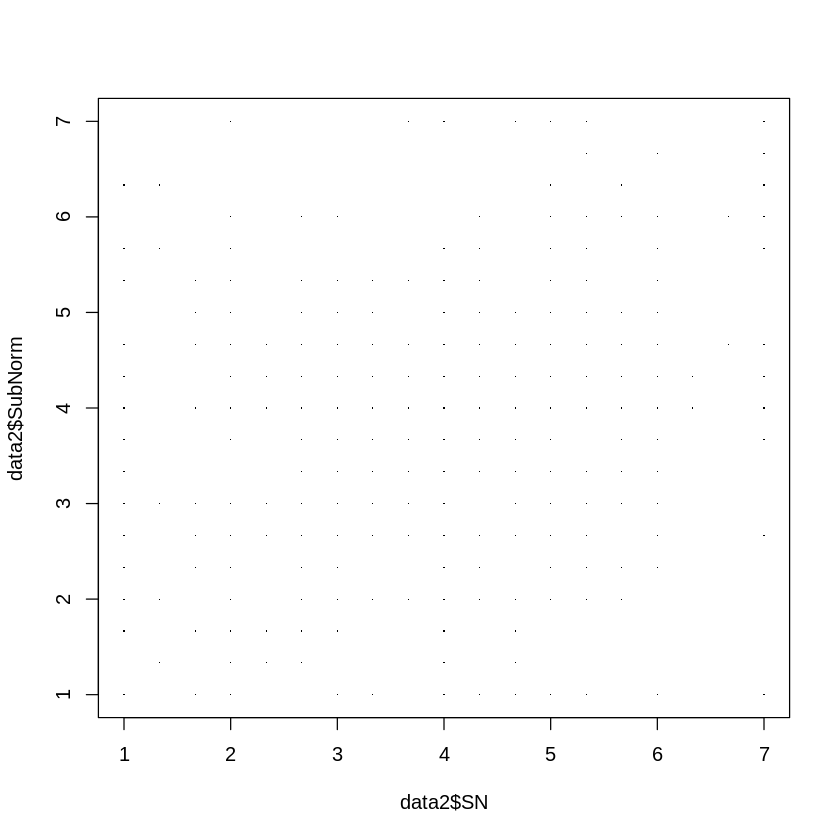

In [33]:
plot(data2$SN,data2$SubNorm,pch=".",scatter=)

In [141]:
res<-prcomp(data2, retx=F,scale=T)$rotation[,1:21];
resAbs <- res;
resAbs[res<0] <- -res[res<0];
z <- cumsum(prcomp(data2, retx=F,scale=T)$sdev^2)/
     sum(prcomp(data2, retx=F,scale=T)$sdev^2)

for (i in 1:21){
  print(z[i]);
  print(t(res[resAbs[,i]>.2,i,drop=FALSE]));
}


[1] 0.16
    Frugal    MC EnergyC  Atti SubNorm   PBC   SN HabitG HabitC
PC1  -0.37 -0.32   -0.37 -0.41   -0.31 -0.23 -0.2  -0.28  -0.25
[1] 0.27
      Age OwnRent SqftCate HouseholdS Income
PC2 -0.34   -0.49    -0.51      -0.27  -0.43
[1] 0.34
    IncHomeS Gender HouseholdS Income  Educ ComfNS HabitC
PC3     0.31   0.37       0.37  -0.21 -0.48   0.45  -0.27
[1] 0.4
    HouseholdS Political Ethnic    MC EnergyC ComfNS   PBC HabitG
PC4       0.26      0.45  -0.36 -0.23    0.27  -0.25 -0.39  -0.28
[1] 0.47
    IncHomeS  Age HouseholdS Political Educ EnergyC ComfNS HabitC
PC5     0.44 0.36      -0.39      0.29 0.36     0.2   0.32  -0.22
[1] 0.52
    IncHomeS Ethnic Frugal   MC Trust SubNorm    SN HabitC
PC6    -0.32   0.26   0.27 0.25 -0.41   -0.26 -0.51  -0.26
[1] 0.57
     Age OwnRent Ethnic Income  Educ Trust ComfNS SubNorm HabitG HabitC
PC7 0.38     0.2   -0.4  -0.21 -0.21 -0.23  -0.25   -0.25   0.28   0.35
[1] 0.62
     Age Gender Ethnic Income    MC Trust   PBC
PC8 0.22   0.57   0.5

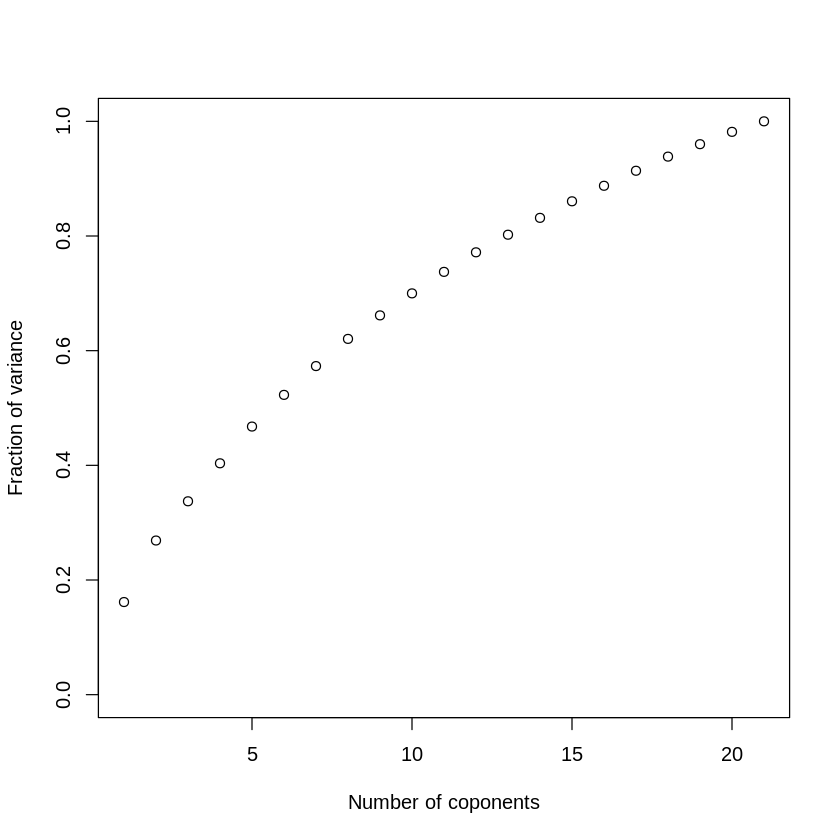

In [142]:
plot(1:dim(data2)[2],cumsum(prcomp(data2, retx=F,scale=T)$sdev^2)/
     sum(prcomp(data2, retx=F,scale=T)$sdev^2),
     ylim=c(0,1),xlab="Number of coponents",
     ylab="Fraction of variance");

In [143]:
res <- c();
vnam <- names(data2);
for (i in 2:dim(data2)[2]){
  fmla <- as.formula(paste(vnam[i],paste(vnam[-c(1,i)],collapse="+"),sep="~"));
  res <- rbind(res,c(i,round(summary(lm(fmla,data=data2))$r.squared,2)));
}

In [144]:
row.names(res) <- vnam[res[,1]];
o = order(-res[,2]);
res[o,][res[o,2]<.7,]

Atti,16,0.46
EnergyC,13,0.43
Frugal,11,0.37
SqftCate,5,0.36
OwnRent,4,0.30
MC,12,0.30
HouseholdS,6,0.26
Income,9,0.25
SubNorm,17,0.25
HabitG,20,0.23
HabitC,21,0.23


In [145]:
IndepPred <- row.names(res[o,][res[o,2]<.7,])

In [34]:
IndepPred = c('Atti', 'EnergyC', 'SqftCate', 'OwnRent', 'MC', 'HouseholdS', 'Income', 'SubNorm', 'HabitG', 'HabitC', 'Educ', 'PBC', 'Political', 'Gender', 'ComfNS', 'Ethnic')

In [35]:
fmla <- as.formula(paste("Age",paste(IndepPred,collapse="+"),sep="~"));

In [36]:
table(data2[,"IncHomeS"])


  1   2   3   4   5   6   7   8 
 54  43 124 218  56  63  50  36 

In [37]:
mod = lm(fmla,data=data2)
summary(mod)


Call:
lm(formula = fmla, data = data2)

Residuals:
   Min     1Q Median     3Q    Max 
-24.15  -7.33  -1.70   5.89  33.56 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  10.2473     4.5509    2.25   0.0247 *  
Atti          1.1302     0.4794    2.36   0.0187 *  
EnergyC      -0.5075     0.3639   -1.39   0.1635    
SqftCate      1.7521     0.4436    3.95  8.7e-05 ***
OwnRent       5.4768     0.8930    6.13  1.5e-09 ***
MC           -0.0047     0.4280   -0.01   0.9912    
HouseholdS   -1.7375     0.3747   -4.64  4.3e-06 ***
Income        0.2376     0.2343    1.01   0.3109    
SubNorm      -0.3334     0.3331   -1.00   0.3173    
HabitG        0.2241     0.3837    0.58   0.5594    
HabitC        0.2863     0.2807    1.02   0.3082    
Educ          0.6655     0.3932    1.69   0.0911 .  
PBC           0.0560     0.4601    0.12   0.9032    
Political    -0.6320     0.5272   -1.20   0.2310    
Gender        2.7294     0.8482    3.22   0.0014 ** 
ComfNS       

In [150]:
anova(mod)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Atti,1,6.0e+02,600.81,5.8171,1.6e-02
EnergyC,1,4.0e+02,403.11,3.9029,4.9e-02
Frugal,1,5.8e-01,0.58,0.0056,9.4e-01
SqftCate,1,5.1e+03,5118.27,49.5553,5.1e-12
OwnRent,1,4.8e+03,4792.42,46.4005,2.3e-11
MC,1,1.3e+01,13.44,0.1301,7.2e-01
HouseholdS,1,2.4e+03,2355.23,22.8035,2.2e-06
Income,1,1.4e+02,140.07,1.3562,2.4e-01
SubNorm,1,3.4e+01,33.87,0.3279,5.7e-01
HabitG,1,3.2e+01,31.74,0.3073,5.8e-01


In [151]:
fit <- factanal(data2, 2, rotation="varimax")
print(fit, digits=2, cutoff=.3, sort=TRUE)


Call:
factanal(x = data2, factors = 2, rotation = "varimax")

Uniquenesses:
  IncHomeS        Age     Gender    OwnRent   SqftCate HouseholdS  Political 
      0.97       0.85       0.94       0.59       0.46       0.87       0.92 
    Ethnic     Income       Educ     Frugal         MC    EnergyC      Trust 
      0.99       0.74       0.97       0.58       0.72       0.55       0.94 
    ComfNS       Atti    SubNorm        PBC         SN     HabitG     HabitC 
      0.96       0.42       0.77       0.88       0.88       0.83       0.88 

Loadings:
           Factor1 Factor2
Frugal      0.65          
MC          0.53          
EnergyC     0.66          
Atti        0.76          
OwnRent             0.64  
SqftCate            0.74  
Income              0.51  
IncHomeS                  
Age                 0.38  
Gender                    
HouseholdS          0.35  
Political                 
Ethnic                    
Educ                      
Trust                     
ComfNS      


Call:
lm(formula = IncHomeS ~ ComfNS + Age, data = data2)

Residuals:
   Min     1Q Median     3Q    Max 
-3.748 -1.095 -0.166  1.026  5.155 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.61354    0.31700    5.09  4.7e-07 ***
ComfNS       0.35374    0.04661    7.59  1.1e-13 ***
Age          0.02042    0.00606    3.37  0.00079 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.7 on 641 degrees of freedom
Multiple R-squared:  0.103,	Adjusted R-squared:  0.0998 
F-statistic: 36.6 on 2 and 641 DF,  p-value: 8.52e-16


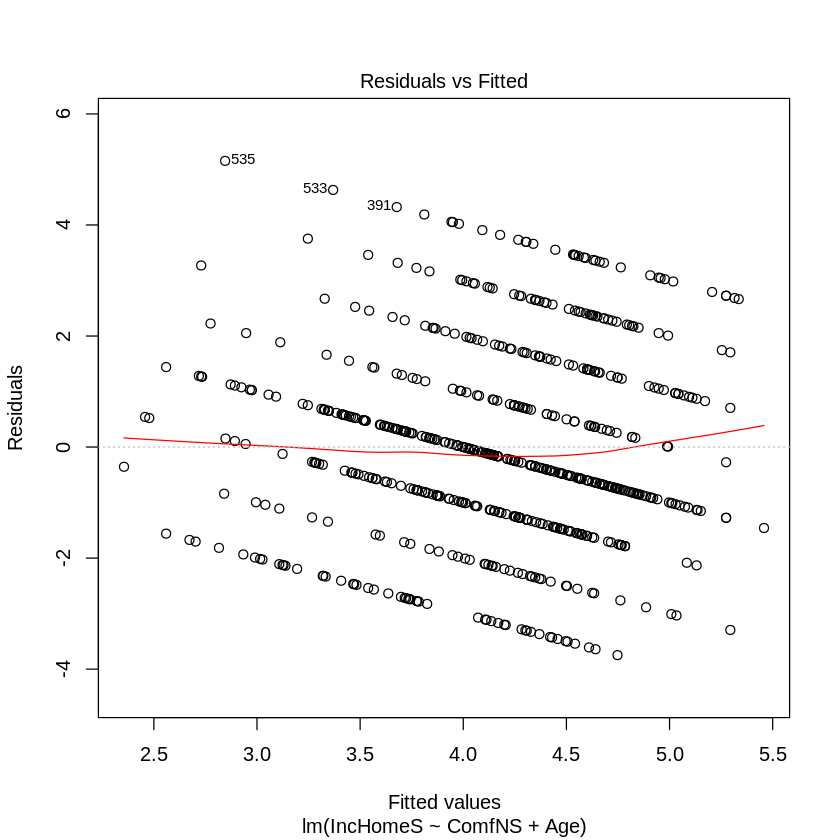

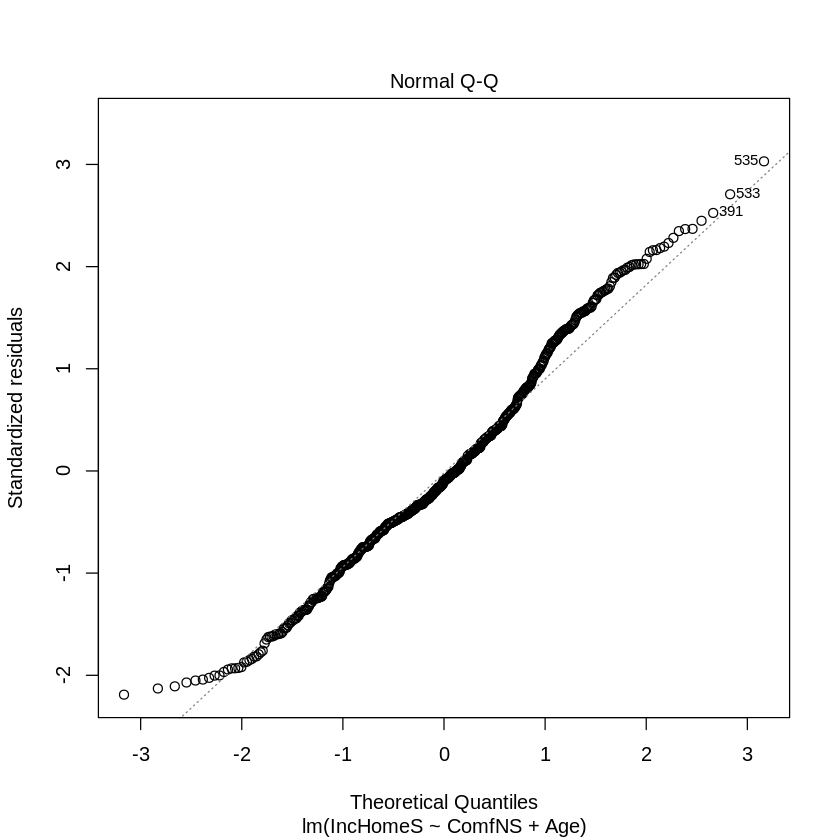

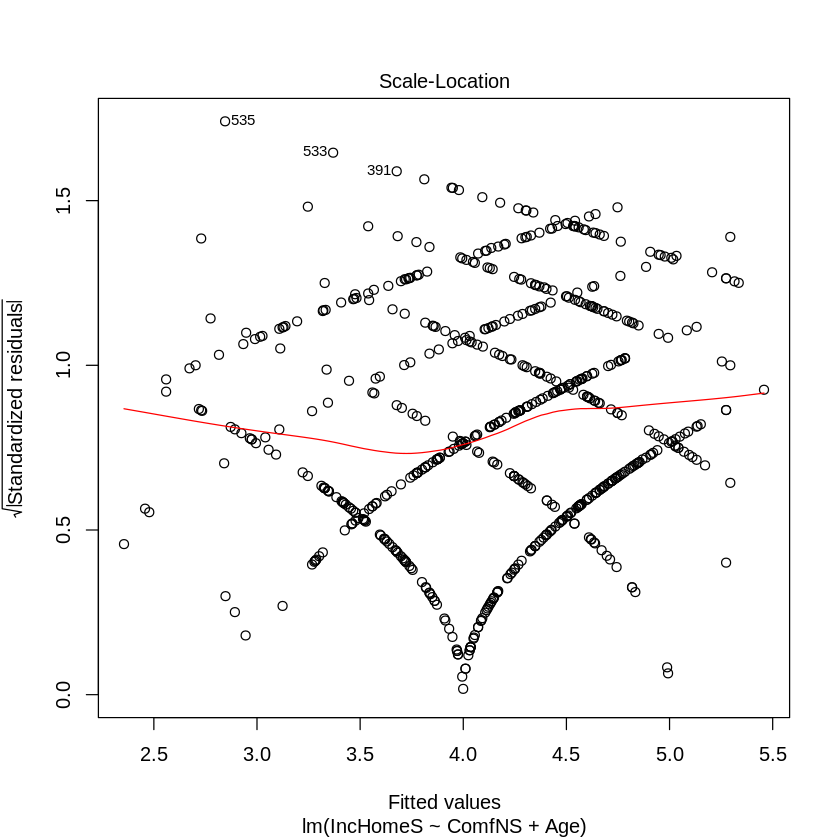

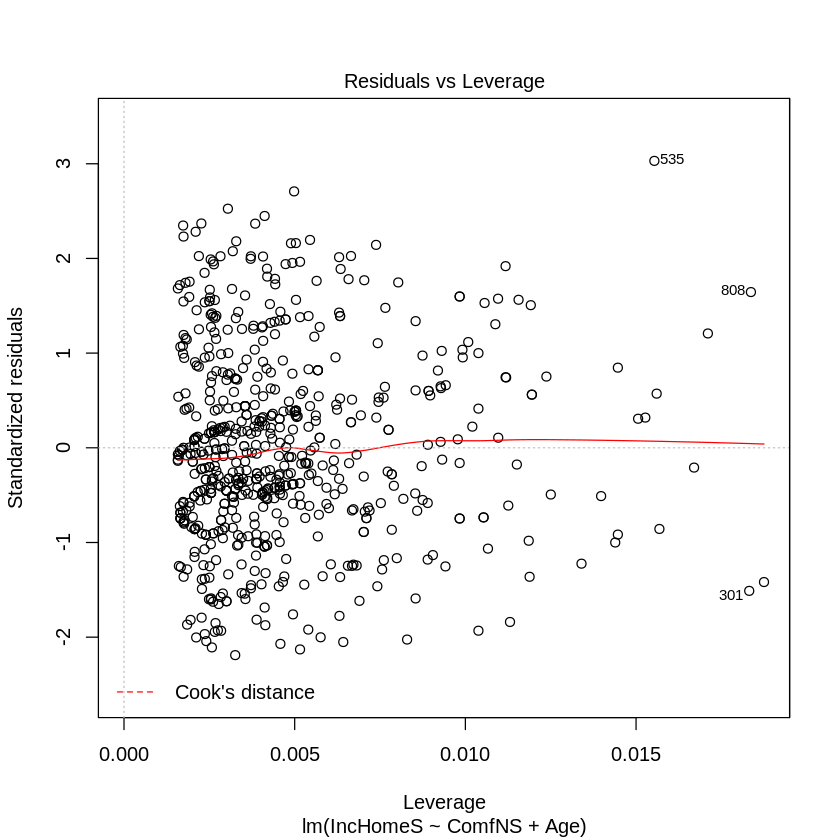

In [152]:
mod = lm(IncHomeS~ComfNS+Age,data=data2)
summary(mod)
plot(mod)

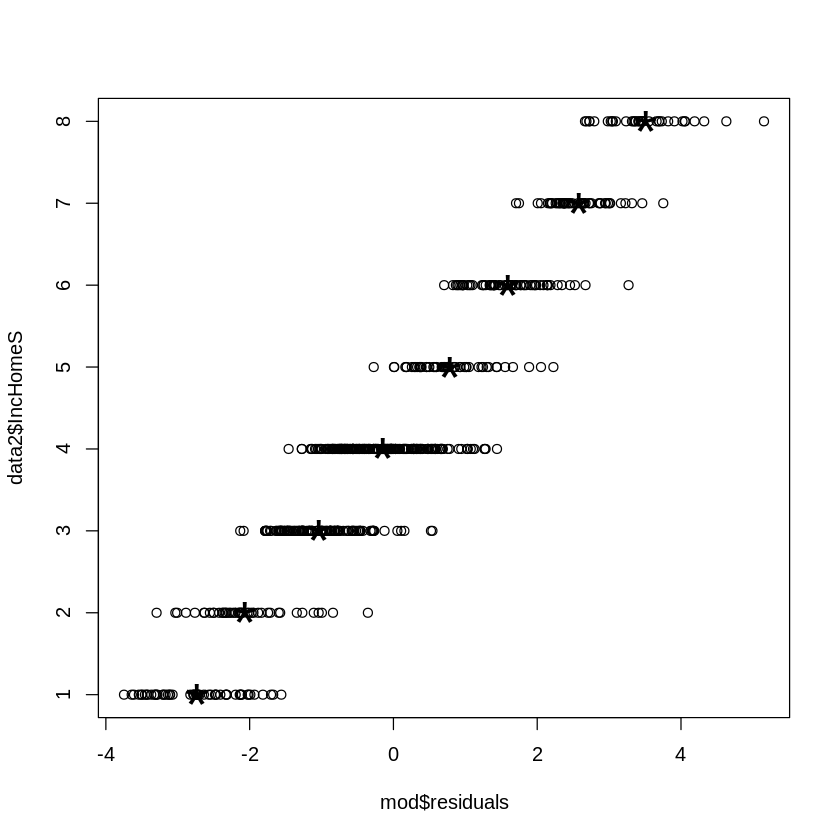

In [153]:
plot(mod$residuals,data2$IncHomeS)
z<-tapply(mod$residuals,data2$IncHomeS,mean)
points(z,1:8,pch="*",cex=3)

In [40]:
mod = lm(IncHomeS~ComfNS3+Age,data=data2)
summary(mod)

ERROR: Error in eval(expr, envir, enclos): object 'ComfNS3' not found


In [41]:
#Probably overfitting
mod1 = lm(IncHomeS~ComfNS3+Age+HabitC2,data=data2)
summary(mod1)

ERROR: Error in eval(expr, envir, enclos): object 'ComfNS3' not found


In [19]:
library(mgcv)


Loading required package: nlme
This is mgcv 1.8-14. For overview type 'help("mgcv-package")'.


In [20]:
mGam = gam(IncHomeS~I(ComfNS3<=3)+I(ComfNS3==7)+s(Age),data=data2)
summary(mGam)



Family: gaussian 
Link function: identity 

Formula:
IncHomeS ~ I(ComfNS3 <= 3) + I(ComfNS3 == 7) + s(Age)

Parametric coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)           4.1826     0.0906   46.17  < 2e-16 ***
I(ComfNS3 <= 3)TRUE  -0.7694     0.1666   -4.62  4.7e-06 ***
I(ComfNS3 == 7)TRUE   0.7656     0.1738    4.40  1.2e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Approximate significance of smooth terms:
       edf Ref.df    F p-value    
s(Age)   1      1 13.3 0.00029 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

R-sq.(adj) =  0.0975   Deviance explained = 10.2%
GCV = 2.9649  Scale est. = 2.9465    n = 644

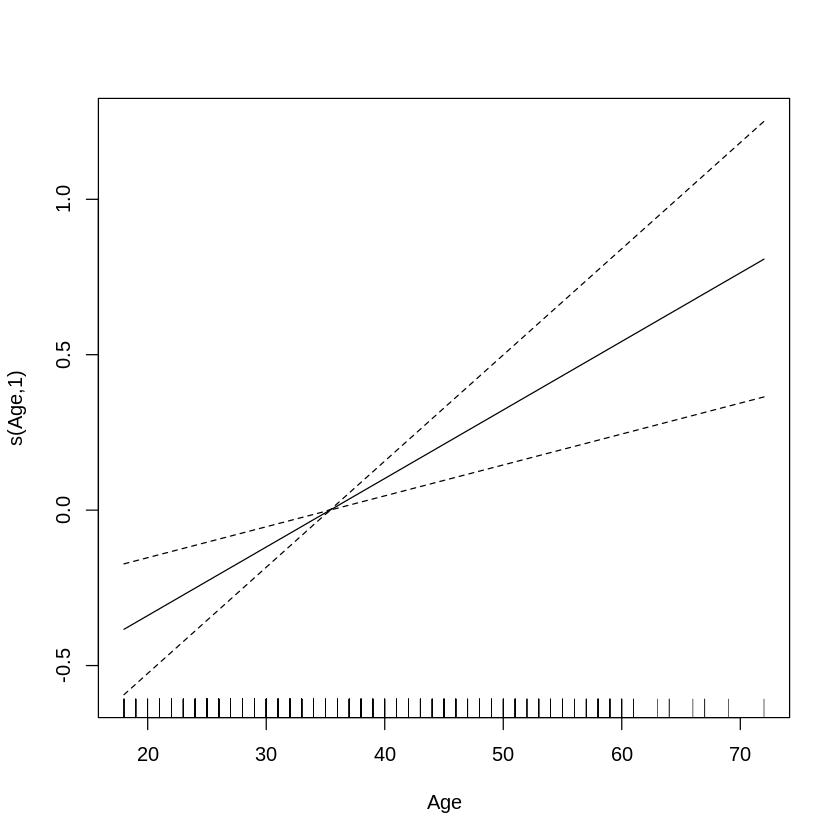

In [21]:
plot(mGam)

In [22]:
mod1 = lm(IncHomeS~I(ComfNS3<=3)+I(ComfNS3==7)+Age+HabitC2+ Political,data=data2)
summary(mod1)



Call:
lm(formula = IncHomeS ~ I(ComfNS3 <= 3) + I(ComfNS3 == 7) + Age + 
    HabitC2 + Political, data = data2)

Residuals:
   Min     1Q Median     3Q    Max 
-4.234 -1.162 -0.081  1.001  4.540 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)          4.19372    0.34065   12.31  < 2e-16 ***
I(ComfNS3 <= 3)TRUE -0.77483    0.16608   -4.67  3.8e-06 ***
I(ComfNS3 == 7)TRUE  0.75141    0.17314    4.34  1.7e-05 ***
Age                  0.02211    0.00602    3.67  0.00026 ***
HabitC2             -0.09516    0.03689   -2.58  0.01011 *  
Political           -0.05864    0.03039   -1.93  0.05408 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.7 on 638 degrees of freedom
Multiple R-squared:  0.116,	Adjusted R-squared:  0.109 
F-statistic: 16.7 on 5 and 638 DF,  p-value: 1.68e-15


In [23]:
anova(mod1)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
I(ComfNS3 <= 3),1,115,115.2,39.6,5.8e-10
I(ComfNS3 == 7),1,59,59.2,20.3,7.7e-06
Age,1,39,39.1,13.4,2.7e-04
HabitC2,1,18,18.4,6.3,1.2e-02
Political,1,11,10.8,3.7,5.4e-02
Residuals,638,1857,2.9,NA,NA


In [24]:
drop1(mod1)

,Df,Sum of Sq,RSS,AIC
<none>,NA,NA,1857,694
I(ComfNS3 <= 3),1,63,1920,713
I(ComfNS3 == 7),1,55,1911,711
Age,1,39,1896,705
HabitC2,1,19,1876,699
Political,1,11,1867,696


In [25]:
library(bnlearn)


Attaching package: 'bnlearn'

The following object is masked from 'package:stats':

    sigma



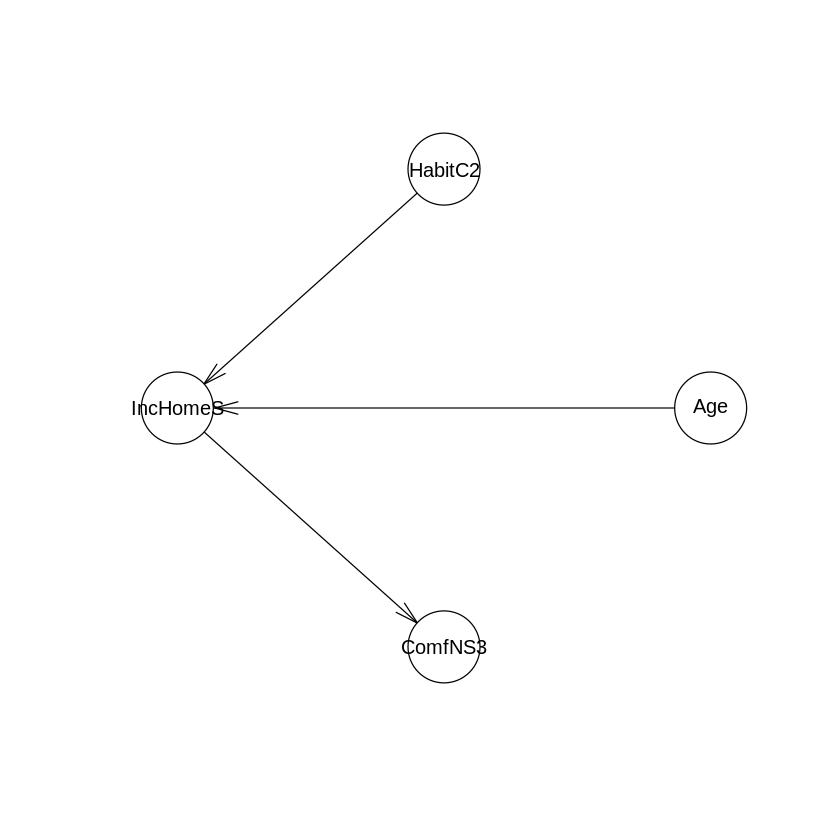

In [26]:
dd2 = data2[,c('IncHomeS', 'ComfNS3','Age','HabitC2')]
for (i in 1:4) dd2[,i] <- as.double(dd2[,i])
dag2 = tabu(dd2)
plot(dag2)

In [27]:
fmlaF <- as.formula(paste("IncHomeS",paste(IVS,collapse="+"),sep="~"));
mod = lm(fmlaF,data=data2)
summary(mod)


Call:
lm(formula = fmlaF, data = data2)

Residuals:
   Min     1Q Median     3Q    Max 
-3.672 -1.120 -0.092  1.051  4.878 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)   
(Intercept)  3.12e+00   1.26e+00    2.49   0.0132 * 
Age          2.37e-02   7.22e-03    3.28   0.0011 **
Gender       1.02e-01   1.56e-01    0.66   0.5117   
OwnRent     -1.93e-03   1.64e-01   -0.01   0.9906   
BillS        6.56e-04   1.27e-03    0.52   0.6060   
NBillS       1.30e-01   1.29e-01    1.01   0.3138   
Sqft        -3.13e-05   1.11e-04   -0.28   0.7776   
SqftCate    -3.01e-02   1.10e-01   -0.27   0.7853   
HouseholdS  -8.02e-02   6.84e-02   -1.17   0.2412   
Political   -6.80e-02   3.33e-02   -2.04   0.0417 * 
Ethnic       1.03e-01   6.05e-02    1.70   0.0901 . 
Income      -3.16e-02   4.24e-02   -0.74   0.4571   
Educ         2.87e-02   6.87e-02    0.42   0.6760   
MC1          2.52e-03   7.09e-02    0.04   0.9716   
MC2          3.68e-02   7.60e-02    0.48   0.6290   
MC3         

In [28]:
#Probably overfitting
mod1 = lm(IncHomeS~ComfNS3+Age+HabitC2+Political+Ethnic+Trust1,data=data2)
summary(mod1)


Call:
lm(formula = IncHomeS ~ ComfNS3 + Age + HabitC2 + Political + 
    Ethnic + Trust1, data = data2)

Residuals:
   Min     1Q Median     3Q    Max 
-4.518 -1.152 -0.131  1.015  4.526 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.53367    0.43662    5.80  1.0e-08 ***
ComfNS3      0.28415    0.03962    7.17  2.1e-12 ***
Age          0.02216    0.00608    3.65  0.00029 ***
HabitC2     -0.09861    0.03698   -2.67  0.00786 ** 
Political   -0.05255    0.03052   -1.72  0.08559 .  
Ethnic       0.09676    0.05622    1.72  0.08571 .  
Trust1       0.02235    0.04340    0.51  0.60675    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.7 on 637 degrees of freedom
Multiple R-squared:  0.114,	Adjusted R-squared:  0.106 
F-statistic: 13.7 on 6 and 637 DF,  p-value: 1.1e-14


In [29]:
for (i in 1:length(IVS){
  fmla <- as.formula(paste(IVS[i],paste(vnam[-c(1,i)],collapse="+"),sep="~"));
  res <- rbind(res,c(i,round(summary(lm(fmla,data=data2))$r.squared,2)));
}
vnam <- (data2);
fmlaF <- as.formula(paste("Age",paste(IVS[-"Age"],collapse="+"),sep="~"));
mod = lm(fmlaF,data=data2)
summary(mod)

ERROR: Error in parse(text = x, srcfile = src): <text>:1:24: unexpected '{'
1: for (i in 1:length(IVS){
                           ^


In [ ]:
ind <- 1:length(IVS);names(ind) <- IVS

In [ ]:
fmlaF <- as.formula(paste("Age",paste(IVS[-ind["Age"]],collapse="+"),sep="~"));
mod = lm(fmlaF,data=data2)
res <- summary(mod)$coefficients
res[abs(res[,3])>3,]

In [ ]:
fmlaF <- as.formula(paste("ComfNS3",paste(IVS[-ind["ComfNS3"]],collapse="+"),sep="~"));
mod = lm(fmlaF,data=data2)
res <- summary(mod)$coefficients
res[abs(res[,3])>3,]

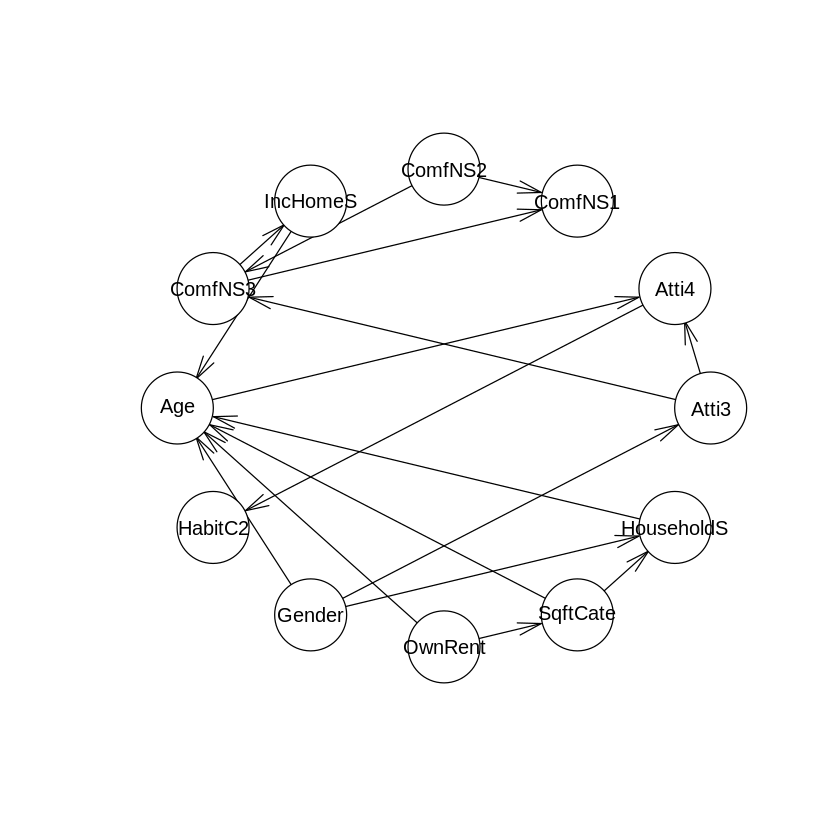

In [30]:
dd2 = data2[,c('IncHomeS', 'ComfNS3','Age','HabitC2',"Gender","OwnRent","SqftCate",
               "HouseholdS","Atti3","Atti4","ComfNS1","ComfNS2")]
for (i in 1:12) dd2[,i] <- as.double(dd2[,i])
dag2 = tabu(dd2)
plot(dag2)